#Exploratory Data Analysis

## Customer data

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

In [ ]:
customer_df = pd.read_csv('https://raw.githubusercontent.com/brnnwon/sale_order/main/dataset/customer.csv')
customer_df.head()

,id,title,first_name,middle_name,last_name,gender,date_of_birth,street,street2,city,state,email,phone
0,95,Mr.,Aaron,Charles,Murphy,M,2011-10-30,17353 Adams Street,NaN,Vancouver,Washington,a.murphy@yahoo.com,077-600-2726
1,200,Mr.,Aaron,Edward,Gonzales,M,2021-02-08,33 Primrose Lane,NaN,Shanks,West Virginia,a_gonzales@rocketmail.com,082-118-9972
2,459,Mr.,Aaron,Wayne,Jones,M,2016-08-27,32137 State Street,NaN,Saint Amant,Louisiana,aaron_wayne_jones17@live.com,096-124-1696
3,609,Mr.,Aaron,Joseph,Jones,M,2014-03-25,92468 3rd Street West,NaN,Chatham,Louisiana,a.jones@rocketmail.com,064-791-7998
4,654,Mr.,Aaron,Joseph,Rivera,M,2022-02-11,45249 Maple Avenue,NaN,Reno,Nevada,a_rivera@gmail.com,097-209-7023


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1002 non-null   int64 
 1   title          1002 non-null   object
 2   first_name     1002 non-null   object
 3   middle_name    1000 non-null   object
 4   last_name      1002 non-null   object
 5   gender         1002 non-null   object
 6   date_of_birth  1002 non-null   object
 7   street         1002 non-null   object
 8   street2        255 non-null    object
 9   city           1002 non-null   object
 10  state          1002 non-null   object
 11  email          1002 non-null   object
 12  phone          1002 non-null   object
dtypes: int64(1), object(12)
memory usage: 101.9+ KB


### Initial Explore

In [ ]:
# Check for duplicate rows
duplicates = customer_df.duplicated()

# Print the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [ ]:
customer_df['id'].describe()

count    1002.000000
mean      499.498004
std       289.400242
min        -2.000000
25%       249.250000
50%       499.500000
75%       749.750000
max      1000.000000
Name: id, dtype: float64

In [ ]:
customer_df.isnull().sum()

id                 0
title              0
first_name         0
middle_name        2
last_name          0
gender             0
date_of_birth      0
street             0
street2          747
city               0
state              0
email              0
phone              0
dtype: int64

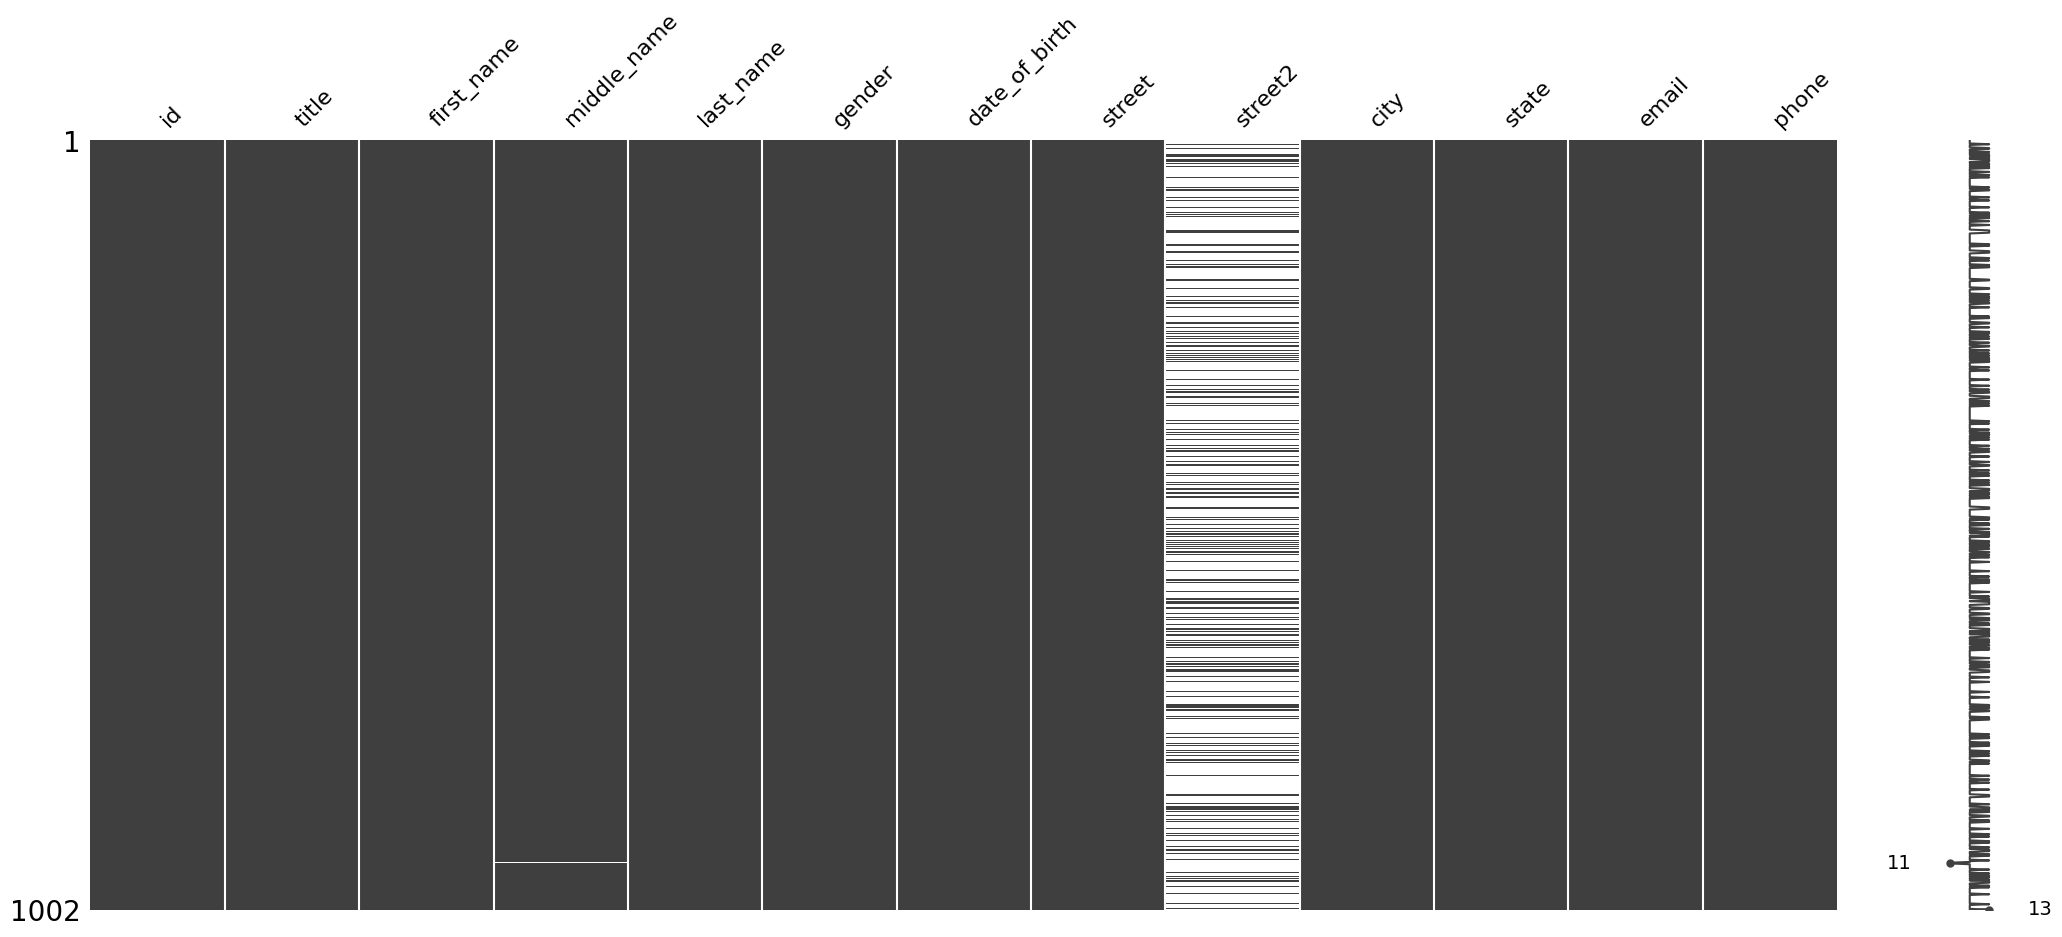

In [ ]:
msno.matrix(customer_df)
plt.show()

Missing values in `middle_name` and `street2`

### View the unique value

In [ ]:
# Creating the dictionary and report
unique_values_details = {}
report = []

for column in customer_df.columns:
    if customer_df[column].dtype == 'object' and customer_df[column].nunique() <= 100:
        unique_counts = customer_df[column].value_counts()
        num_unique_values = customer_df[column].nunique()
        unique_values_details[column] = {
            'num_unique_values': num_unique_values,
            'unique_counts': unique_counts
        }
        report.append(f"Column: {column}")
        report.append(f"Number of Unique Values: {num_unique_values}")
        report.append("Unique Values and Counts:")
        report.append(unique_counts.to_string())
        report.append("----------" * 5)

# Joining the report list into a single string
detailed_report = "\n".join(report)

print(detailed_report)

Column: title
Number of Unique Values: 3
Unique Values and Counts:
title
Mr.     467
Ms.     286
Mrs.    249
--------------------------------------------------
Column: middle_name
Number of Unique Values: 49
Unique Values and Counts:
middle_name
May          48
Renee        43
Lee          37
Joseph       34
Jane         28
Ruth         28
Anthony      26
Mary         24
Sue          24
Eugene       23
Louise       23
Grace        23
Michael      23
Charles      22
Marie        22
Matthew      21
George       21
Faith        21
Richard      21
David        21
James        20
Jean         20
Kay          20
Irene        19
Allen        19
Elizabeth    19
Ann          18
Rose         18
Michelle     18
Margaret     17
William      17
Andrew       17
Alan         16
Scott        16
Ray          16
Anne         15
John         15
Mae          15
Nicole       15
Thomas       15
Edward       15
Francis      15
Lou          14
Alexander    14
Henry        14
Robert       14
Dawn         12
Ly

Notice that number of the `gender` and `title` is not matched, `Mr.` contained 467 records whereas `gender` == `M` is 466 we will filter the data and replace the incorrect.

In [ ]:
# Filtering the DataFrame to find records where title is 'Mr.' but gender is not 'M'
mismatch_records = customer_df[(customer_df['title'] == 'Mr.') & (customer_df['gender'] != 'M')]

# Display the mismatched records
mismatch_records

,id,title,first_name,middle_name,last_name,gender,date_of_birth,street,street2,city,state,email,phone
940,-1,Mr.,Test User,NaN,Test Order,F,1970-01-01,1 Main Street,NaN,Fort Collins,Colorado,test.user.test.order@company.com,066-833-4267


In [ ]:
customer_df[customer_df['id']<=0]

,id,title,first_name,middle_name,last_name,gender,date_of_birth,street,street2,city,state,email,phone
939,-2,Mr.,Test User,NaN,Bad Data,M,1970-01-01,1 Main Street,NaN,Fort Collins,Colorado,test.user.bad.data@company.com,086-352-1853
940,-1,Mr.,Test User,NaN,Test Order,F,1970-01-01,1 Main Street,NaN,Fort Collins,Colorado,test.user.test.order@company.com,066-833-4267


Since the `id` less than or equal 0 is not revelant to the data, we will filter this value from our dataset.

### Filter id

In [ ]:
customer_filt = customer_df[customer_df['id']>0]

In [ ]:
customer_filt.shape

(1000, 13)

In [ ]:
# Creating the dictionary and report in a single loop to reduce complexity
unique_values_details = {}
report = []

for column in customer_filt.columns:
    if customer_filt[column].dtype == 'object' and customer_filt[column].nunique() <= 10:
        unique_counts = customer_filt[column].value_counts()
        num_unique_values = customer_filt[column].nunique()
        unique_values_details[column] = {
            'num_unique_values': num_unique_values,
            'unique_counts': unique_counts
        }
        report.append(f"Column: {column}")
        report.append(f"Number of Unique Values: {num_unique_values}")
        report.append("Unique Values and Counts:")
        report.append(unique_counts.to_string())
        report.append("----------" * 5)

# Joining the report list into a single string
detailed_report = "\n".join(report)

print(detailed_report)

Column: title
Number of Unique Values: 3
Unique Values and Counts:
title
Mr.     465
Ms.     286
Mrs.    249
--------------------------------------------------
Column: gender
Number of Unique Values: 2
Unique Values and Counts:
gender
F    535
M    465
--------------------------------------------------


The result of the dataset is between `Mr.` and `M` is matched.

### Feature Engineering and Feature Selection

In this section, we will selected the dataset with the condition
- Remove the feature that contained missing values which are `middle_name` and `street2`
- Select only the data that will use in the visualization and database (e.g. `id`, `city` and `State`)
- Create the new feature `Age` from `date_of_birth`, Categorize Age Groups (child, young_adult, adult, elder)

In [ ]:
# Ensure the date_of_birth column is in datetime format
customer_df.loc[:, 'date_of_birth'] = pd.to_datetime(customer_df['date_of_birth'], errors='coerce')

# Calculate the age using relativedelta
def calculate_age(born):
    if pd.isnull(born):
        return None
    return relativedelta(pd.Timestamp.now(), born).years

customer_df.loc[:, 'Age'] = customer_df['date_of_birth'].apply(calculate_age)

In [ ]:
# Display the DataFrame with the new Age feature
print(customer_filt[['date_of_birth', 'Age']].head())

  date_of_birth  Age
0    2011-10-30   12
1    2021-02-08    3
2    2016-08-27    7
3    2014-03-25   10
4    2022-02-11    2


In [ ]:
customer_filt[['Age','date_of_birth']].describe()

,Age,date_of_birth
count,1000.000000,1000
mean,6.732000,2017-03-11 09:38:52.800000256
min,0.000000,2010-01-02 00:00:00
25%,3.000000,2013-05-14 06:00:00
50%,7.000000,2017-05-05 00:00:00
75%,11.000000,2020-12-04 12:00:00
max,14.000000,2024-04-15 00:00:00
std,4.188761,NaN


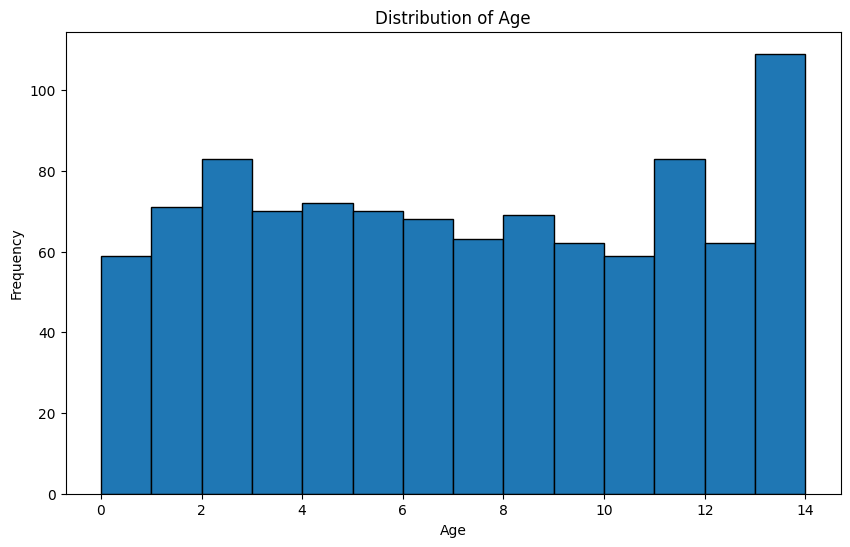

In [ ]:
# Plot histogram to view the distribution of Age
plt.figure(figsize=(10, 6))
customer_filt['Age'].hist(bins=14, edgecolor='black') # using binning of histogram = 14 to view the frequency of age start from 0 - 14
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

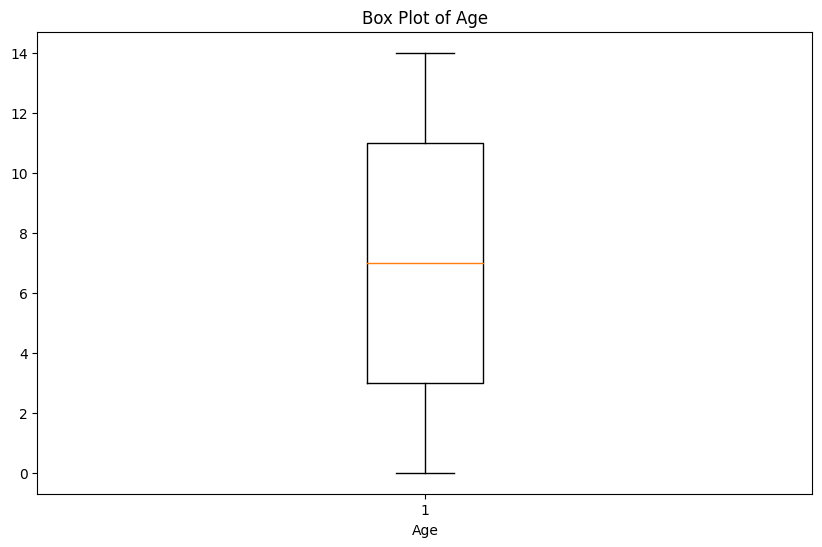

In [ ]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(customer_filt['Age'].dropna(), vert=True)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

According to the histrogram and boxplot of the new feature `Age`, It seemed that the range of the age of customer does not make sense caused the child especially under 5 years old could not be able to order the product, but we will ignore this age range which between 0 - 14 years. Also the box plot should visulize the median of the Age of customer of this data which around 7 years old while the max age is 14 and the minimum age that order the product is 0 year old.

In [ ]:
# Define new age groups based on the observed age distribution
def categorize_custom_age_group(age):
    if age is None:
        return 'unknown'
    if age <= 3:
        return 'Baby'
    elif age <= 7:
        return 'Junior'
    elif age <= 12:
        return 'Pre-Teen'
    else:
        return 'Teen and Older'

customer_filt.loc[:, 'Age_Group'] = customer_filt['Age'].apply(categorize_custom_age_group)

In [ ]:
# Display the first few rows of the DataFrame with the new age groups
print(customer_filt[['Age', 'Age_Group']].head())

   Age Age_Group
0   12  Pre-Teen
1    3      Baby
2    7    Junior
3   10  Pre-Teen
4    2      Baby


In [ ]:
selected_columns = ['id', 'first_name', 'last_name', 'gender', 'date_of_birth', 'Age', 'Age_Group', 'city', 'state']
cus_selected_df = customer_filt[selected_columns]

In [ ]:
cus_selected_df

,id,first_name,last_name,gender,date_of_birth,Age,Age_Group,city,state
0,95,Aaron,Murphy,M,2011-10-30,12,Pre-Teen,Vancouver,Washington
1,200,Aaron,Gonzales,M,2021-02-08,3,Baby,Shanks,West Virginia
2,459,Aaron,Jones,M,2016-08-27,7,Junior,Saint Amant,Louisiana
3,609,Aaron,Jones,M,2014-03-25,10,Pre-Teen,Chatham,Louisiana
4,654,Aaron,Rivera,M,2022-02-11,2,Baby,Reno,Nevada
...,...,...,...,...,...,...,...,...,...
997,377,Zachary,Davis,M,2024-01-26,0,Baby,Savery,Wyoming
998,402,Zachary,Brown,M,2011-06-30,12,Pre-Teen,Gillett,Texas
999,552,Zachary,Hernandez,M,2014-03-10,10,Pre-Teen,Redding Center,Connecticut
1000,780,Zachary,Morris,M,2021-10-10,2,Baby,Milford,Kansas


In [ ]:
cus_selected_df.isnull().sum()

id               0
first_name       0
last_name        0
gender           0
date_of_birth    0
Age              0
Age_Group        0
city             0
state            0
dtype: int64

In [ ]:
cus_selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1001
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             1000 non-null   int64         
 1   first_name     1000 non-null   object        
 2   last_name      1000 non-null   object        
 3   gender         1000 non-null   object        
 4   date_of_birth  1000 non-null   datetime64[ns]
 5   Age            1000 non-null   int64         
 6   Age_Group      1000 non-null   object        
 7   city           1000 non-null   object        
 8   state          1000 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 78.1+ KB


Save the data to `.csv`

In [ ]:
cus_selected_df.to_csv('customer_cleaned.csv', index=False)

## Order data

In [12]:
order_df = pd.read_csv('https://raw.githubusercontent.com/brnnwon/sale_order/main/dataset/order.csv')
order_df.head()

,id,customer_id,product_id,order_creation_time,sale_quantity,sale_price_per_item,sale_price_before_discount,discount_platform,discount_seller,discount_total,sales_price_after_discount,payment_method_id,order_status
0,ef0bcfdd-95b0-886d-74da-6f08a12bd813,980,34,2023-01-01 01:05:39,1,54.95,54.95,0.00,2.20,2.20,52.75,1,1
1,27508821-8b6c-366d-9f83-67520ecf588f,79,98,2023-01-01 01:06:17,1,161.95,161.95,0.00,0.00,0.00,161.95,2,1
2,c8db8f9c-77c6-7122-272b-cb5aa585d3fc,53,13,2023-01-01 01:35:31,2,86.99,173.98,0.00,0.00,0.00,173.98,4,1
3,037af55e-dca0-6617-0b95-fe6e99951994,416,14,2023-01-01 03:10:36,2,10.00,20.00,0.80,1.40,2.20,17.80,5,3
4,1bea126f-8c5f-9fd6-a1e1-f06d5083e414,204,49,2023-01-01 03:52:15,1,150.95,150.95,0.00,1.51,1.51,149.44,7,1


### Initial Explore

In [13]:
order_df.shape

(5000, 13)

In [35]:
# Check for duplicate rows
duplicates = order_df.duplicated()

# Print the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


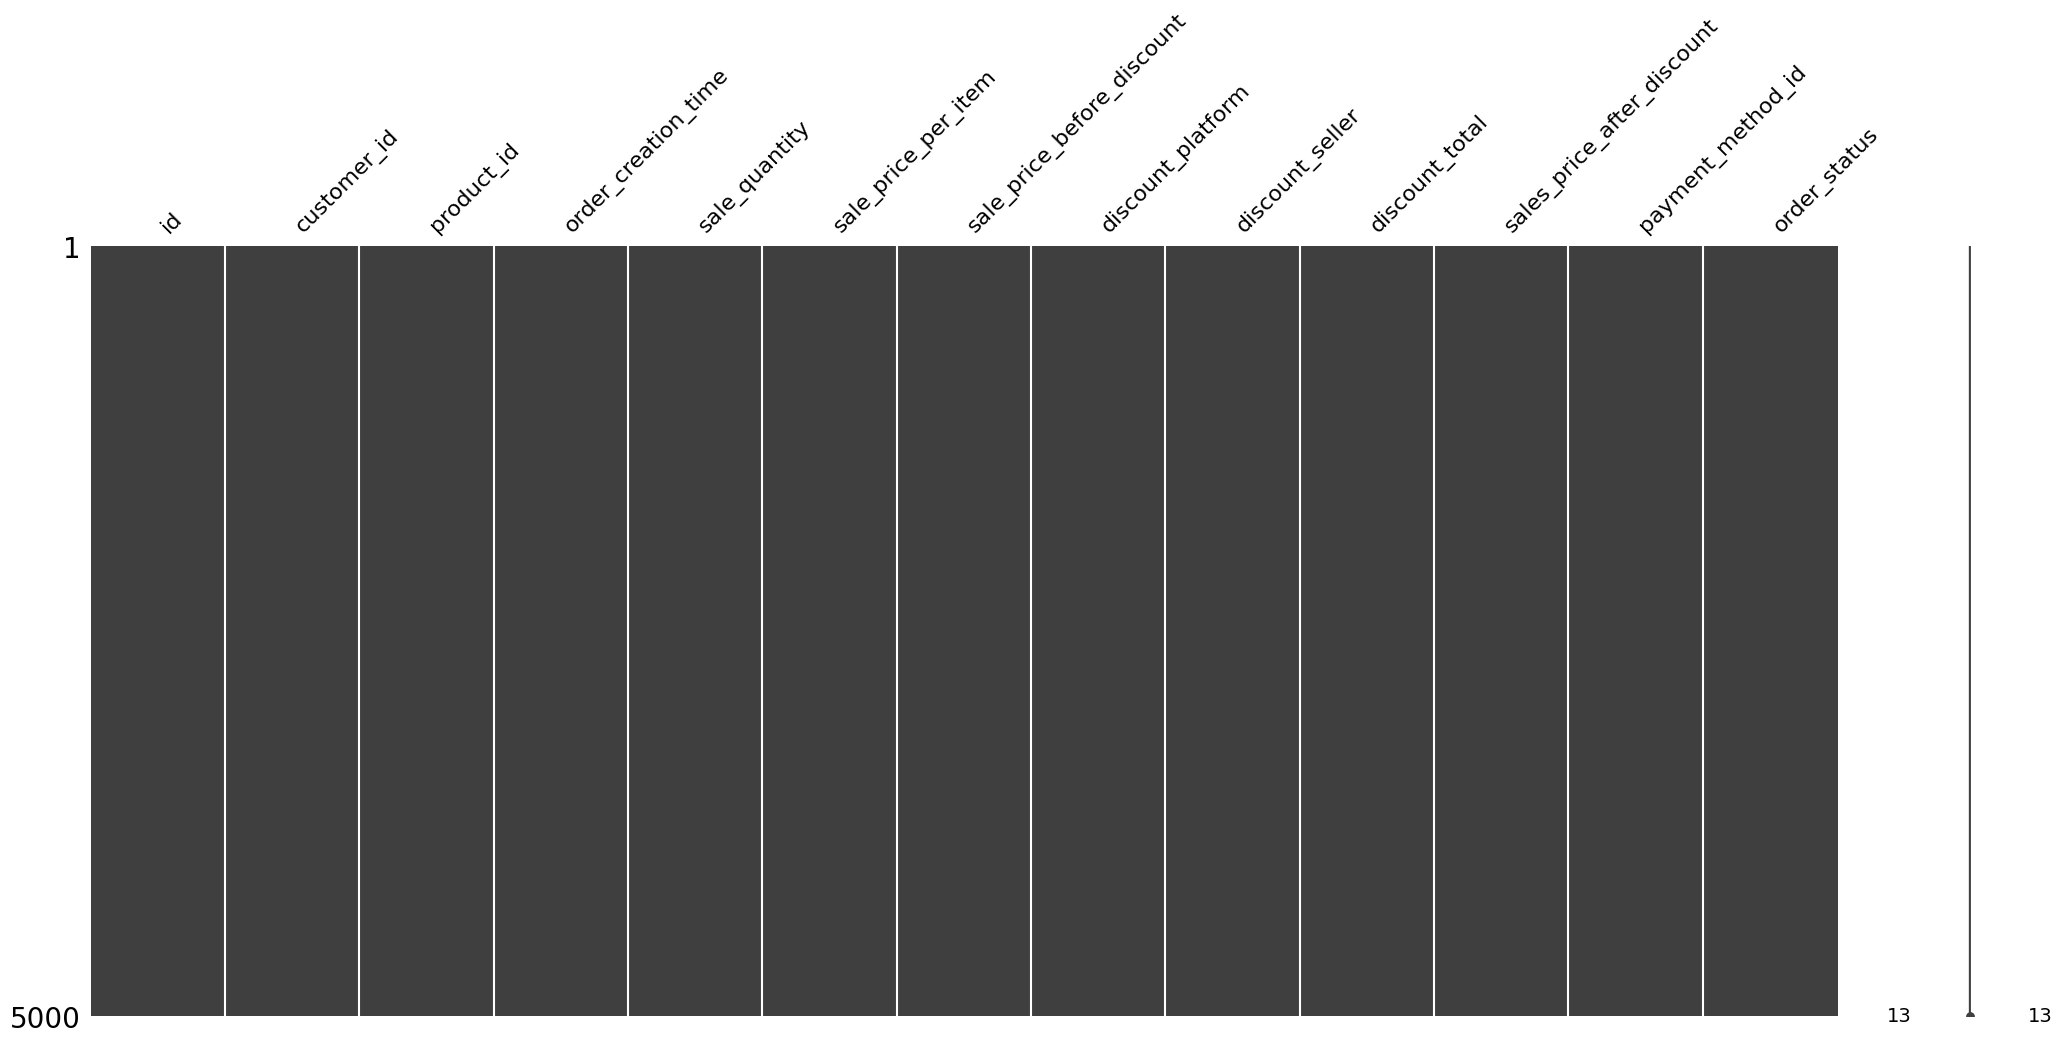

In [36]:
msno.matrix(order_df)
plt.show()

- No missing value
- No duplicate value

In [14]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          5000 non-null   object
 1   customer_id                 5000 non-null   int64 
 2   product_id                  5000 non-null   int64 
 3   order_creation_time         5000 non-null   object
 4   sale_quantity               5000 non-null   int64 
 5   sale_price_per_item         5000 non-null   object
 6   sale_price_before_discount  5000 non-null   object
 7   discount_platform           5000 non-null   object
 8   discount_seller             5000 non-null   object
 9   discount_total              5000 non-null   object
 10  sales_price_after_discount  5000 non-null   object
 11  payment_method_id           5000 non-null   int64 
 12  order_status                5000 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 507.9+ KB


### Abnormality of data

In [17]:
# Check and report non-convertible values before conversion
columns_to_float = ['sale_price_per_item', 'sale_price_before_discount', 'discount_platform',
                    'discount_seller', 'discount_total', 'sales_price_after_discount']

for column in columns_to_float:
    non_convertible = order_df[column].apply(pd.to_numeric, errors='coerce').isna()
    if non_convertible.any():
        print(f"Non-convertible values in {column}:")
        print('------------' * 5)
        print(order_df.loc[non_convertible, column])

Non-convertible values in sale_price_per_item:
------------------------------------------------------------
685     999,999.00
1095    999,999.00
3547    999,999.00
Name: sale_price_per_item, dtype: object
Non-convertible values in sale_price_before_discount:
------------------------------------------------------------
685     2,999,997.00
1095      999,999.00
3547      999,999.00
Name: sale_price_before_discount, dtype: object
Non-convertible values in discount_platform:
------------------------------------------------------------
3547    49,999.95
Name: discount_platform, dtype: object
Non-convertible values in discount_seller:
------------------------------------------------------------
3547    79,999.92
Name: discount_seller, dtype: object
Non-convertible values in discount_total:
------------------------------------------------------------
3547    129,999.87
Name: discount_total, dtype: object
Non-convertible values in sales_price_after_discount:
----------------------------------

According to the `,` in the data that should be the numeric, I suspected that due to the `product_id` less than or equal to 0 that is the test data in the transaction. However, I should filter the index that contained the abnormal in the numeric data.

In [18]:
# filter the data for the index no. 685, 1095 and 3547
order_df.loc[[685, 1095, 3547]]

,id,customer_id,product_id,order_creation_time,sale_quantity,sale_price_per_item,sale_price_before_discount,discount_platform,discount_seller,discount_total,sales_price_after_discount,payment_method_id,order_status
685,77a17f92-3073-8d29-6a13-f35988ebfd77,0,-1,2023-02-18 16:01:01,3,"999,999.00","2,999,997.00",0.00,0.00,0.00,"2,999,997.00",5,1
1095,9c67b541-7b64-e6c4-96a7-b49e4c0df887,0,-1,2023-03-20 15:16:37,1,"999,999.00","999,999.00",0.00,0.00,0.00,"999,999.00",4,3
3547,0a4cb871-612b-b4a4-b7d2-b9573b6fb00f,-2,-1,2023-09-16 22:40:21,1,"999,999.00","999,999.00","49,999.95","79,999.92","129,999.87","869,999.13",4,2


Accoding to the data, the `product_id` greater or equal 0 should be filter to avoid the abnormality of this dataset.

### Filter product_id

In [21]:
order_filt = order_df[order_df['product_id']>0]
order_filt.shape

(4990, 13)

In [24]:
order_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4990 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          4990 non-null   object
 1   customer_id                 4990 non-null   int64 
 2   product_id                  4990 non-null   int64 
 3   order_creation_time         4990 non-null   object
 4   sale_quantity               4990 non-null   int64 
 5   sale_price_per_item         4990 non-null   object
 6   sale_price_before_discount  4990 non-null   object
 7   discount_platform           4990 non-null   object
 8   discount_seller             4990 non-null   object
 9   discount_total              4990 non-null   object
 10  sales_price_after_discount  4990 non-null   object
 11  payment_method_id           4990 non-null   int64 
 12  order_status                4990 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 545.8+ KB


In [28]:
# Convert columns to float
columns_to_float = ['sale_price_per_item', 'sale_price_before_discount', 'discount_platform',
                    'discount_seller', 'discount_total', 'sales_price_after_discount']

for column in columns_to_float:
    order_filt.loc[:, column] = pd.to_numeric(order_filt[column], errors='coerce')

In [30]:
# Convert order_creation_time to datetime
order_filt.loc[:, 'order_creation_time'] = pd.to_datetime(order_filt['order_creation_time'], errors='coerce')

In [32]:
order_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4990 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          4990 non-null   object        
 1   customer_id                 4990 non-null   int64         
 2   product_id                  4990 non-null   int64         
 3   order_creation_time         4990 non-null   datetime64[ns]
 4   sale_quantity               4990 non-null   int64         
 5   sale_price_per_item         4990 non-null   float64       
 6   sale_price_before_discount  4990 non-null   float64       
 7   discount_platform           4990 non-null   float64       
 8   discount_seller             4990 non-null   float64       
 9   discount_total              4990 non-null   float64       
 10  sales_price_after_discount  4990 non-null   float64       
 11  payment_method_id           4990 non-null   int64         
 1

In [34]:
order_filt.describe()

,customer_id,product_id,order_creation_time,sale_quantity,sale_price_per_item,sale_price_before_discount,discount_platform,discount_seller,discount_total,sales_price_after_discount,payment_method_id,order_status
count,4990.000000,4990.000000,4990,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,492.824449,53.475551,2023-07-02 03:39:03.133266688,1.997796,69.940361,138.874427,4.971561,5.140545,10.112106,128.762321,4.026052,2.001002
min,1.000000,1.000000,2023-01-01 01:05:39,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,241.000000,27.000000,2023-04-01 09:41:57.249999872,1.000000,35.950000,55.990000,0.000000,0.000000,0.000000,50.495000,2.000000,1.000000
50%,490.000000,54.000000,2023-07-01 08:27:51.500000,2.000000,65.950000,111.980000,0.000000,0.000000,4.380000,104.930000,4.000000,2.000000
75%,745.000000,80.000000,2023-10-01 15:24:49.750000128,3.000000,102.000000,197.970000,6.160000,6.160000,14.207500,184.057500,6.000000,3.000000
max,1000.000000,105.000000,2023-12-31 21:17:28,3.000000,161.950000,485.850000,68.020000,72.880000,136.040000,485.850000,7.000000,3.000000
std,290.050495,30.632945,NaN,0.825648,42.439042,107.426612,9.235714,9.591748,14.436304,100.626209,1.995616,0.822488


### Feature Selection

Since the `id` in the `order` data is irrevelent. Therefore I will select only the numerical and datetime for data model.

In [39]:
selected_col = ['customer_id',
 'product_id',
 'order_creation_time',
 'sale_quantity',
 'sale_price_per_item',
 'sale_price_before_discount',
 'discount_platform',
 'discount_seller',
 'discount_total',
 'sales_price_after_discount',
 'payment_method_id',
 'order_status']

In [40]:
# Select all columns except 'id'
order_selected_df = order_filt[selected_col]

In [41]:
order_selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4990 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customer_id                 4990 non-null   int64         
 1   product_id                  4990 non-null   int64         
 2   order_creation_time         4990 non-null   datetime64[ns]
 3   sale_quantity               4990 non-null   int64         
 4   sale_price_per_item         4990 non-null   float64       
 5   sale_price_before_discount  4990 non-null   float64       
 6   discount_platform           4990 non-null   float64       
 7   discount_seller             4990 non-null   float64       
 8   discount_total              4990 non-null   float64       
 9   sales_price_after_discount  4990 non-null   float64       
 10  payment_method_id           4990 non-null   int64         
 11  order_status                4990 non-null   int64         
dt

In [42]:
order_selected_df.shape

(4990, 12)

In [43]:
order_selected_df.to_csv('order_cleaned.csv', index=False)

## Product data

In [44]:
product_df = pd.read_csv('https://raw.githubusercontent.com/brnnwon/sale_order/main/dataset/product.csv')
product_df.head()

,product_id,name,category,subcategory,product_category_id,purchase_price,sale_price_full,sale_price_discounted
0,87,Aquarium Accessory,Pets,Aquarium,38,4.0,40.99,32.99
1,54,Aquarium Apparatus,Pets,Aquarium,38,16.0,156.95,109.00
2,40,Aquarium Machine,Pets,Aquarium,38,7.0,69.99,48.00
3,9,Aquarium Mechanism,Pets,Aquarium,38,16.0,158.95,126.00
4,30,Baby Doodad,Clothing,Baby,15,1.0,14.00,11.95


### Initial Explore

In [45]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             108 non-null    int64  
 1   name                   108 non-null    object 
 2   category               108 non-null    object 
 3   subcategory            108 non-null    object 
 4   product_category_id    108 non-null    int64  
 5   purchase_price         108 non-null    float64
 6   sale_price_full        108 non-null    float64
 7   sale_price_discounted  108 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 6.9+ KB


In [46]:
product_df.shape

(108, 8)

In [49]:
product_df.describe()

,product_id,product_category_id,purchase_price,sale_price_full,sale_price_discounted
count,108.00000,108.000000,108.000000,108.000000,108.000000
mean,51.50000,21.185185,10.086944,18608.682778,9326.665556
std,31.32092,11.646786,10.373873,135432.870048,96218.410634
min,-2.00000,1.000000,0.000000,0.000000,-1.000000
25%,24.75000,11.000000,4.000000,41.740000,25.740000
50%,51.50000,23.000000,9.000000,90.950000,65.470000
75%,78.25000,31.000000,14.000000,142.490000,101.250000
max,105.00000,39.000000,74.990000,1000000.000000,999999.000000


In [52]:
# Check for duplicate rows
duplicates = product_df.duplicated()

# Print the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [47]:
product_df[product_df['product_id']<=0]

,product_id,name,category,subcategory,product_category_id,purchase_price,sale_price_full,sale_price_discounted
88,-1,Test Product 1,Health,Nutrition,31,0.0,999999.0,999999.0
89,-2,Test Product 2,Health,Nutrition,31,0.0,0.0,0.0
90,0,Test Product 3,Clothing,Baby,15,0.0,1000000.0,-1.0


In [51]:
# Check missing value
product_df.isnull().sum()

product_id               0
name                     0
category                 0
subcategory              0
product_category_id      0
purchase_price           0
sale_price_full          0
sale_price_discounted    0
dtype: int64

### View the unique value

In [50]:
# Creating the dictionary and report
unique_values_details = {}
report = []

for column in product_df.columns:
    if product_df[column].dtype == 'object' and product_df[column].nunique() <= 100:
        unique_counts = product_df[column].value_counts()
        num_unique_values = product_df[column].nunique()
        unique_values_details[column] = {
            'num_unique_values': num_unique_values,
            'unique_counts': unique_counts
        }
        report.append(f"Column: {column}")
        report.append(f"Number of Unique Values: {num_unique_values}")
        report.append("Unique Values and Counts:")
        report.append(unique_counts.to_string())
        report.append("----------" * 5)

# Joining the report list into a single string
detailed_report = "\n".join(report)

print(detailed_report)

Column: category
Number of Unique Values: 9
Unique Values and Counts:
category
Health           20
Activity         19
Entertainment    18
Home             15
Automotive       11
Clothing         10
Pets              5
Beauty            5
Electronics       5
--------------------------------------------------
Column: subcategory
Number of Unique Values: 38
Unique Values and Counts:
subcategory
Nutrition           9
Toy                 6
Vitamin             5
Aquarium            4
Hair Care           4
Truck               4
Storage             4
Game                4
Home Improvement    4
Biking              4
Beach               3
Tire                3
Technology          3
Sports              3
Camping             3
Party               3
Baby                3
Kids                3
Outdoors            3
Cooking             3
Mens                2
Music               2
Personal            2
Book                2
Womens              2
Medicine            2
Kitchen             2
Furniture 

### Filter product_id

In [53]:
product_filt = product_df[product_df['product_id']>0]
product_filt.shape

(105, 8)

In [54]:
product_filt.to_csv('product_cleaned.csv', index=False)

## Product_category

In [55]:
product_cat_df = pd.read_csv('https://raw.githubusercontent.com/brnnwon/sale_order/main/dataset/product_category.csv')
product_cat_df.head()

,id,category_level_1,category_level_2
0,1,Activity,Beach
1,2,Activity,Biking
2,3,Activity,Camping
3,4,Activity,Fitness
4,5,Activity,Outdoors


In [56]:
# Check for duplicate rows
duplicates = product_cat_df.duplicated()

# Print the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [57]:
# Check the unique and number of unique value
unique_values_details = {}
report = []

for column in product_cat_df.columns:
    if product_cat_df[column].dtype == 'object' and product_cat_df[column].nunique() <= 100:
        unique_counts = product_cat_df[column].value_counts()
        num_unique_values = product_cat_df[column].nunique()
        unique_values_details[column] = {
            'num_unique_values': num_unique_values,
            'unique_counts': unique_counts
        }
        report.append(f"Column: {column}")
        report.append(f"Number of Unique Values: {num_unique_values}")
        report.append("Unique Values and Counts:")
        report.append(unique_counts.to_string())
        report.append("----------" * 5)

# Joining the report list into a single string
detailed_report = "\n".join(report)

print(detailed_report)

Column: category_level_1
Number of Unique Values: 9
Unique Values and Counts:
category_level_1
Activity         7
Entertainment    6
Health           5
Home             5
Automotive       4
Clothing         4
Beauty           3
Electronics      3
Pets             2
--------------------------------------------------
Column: category_level_2
Number of Unique Values: 38
Unique Values and Counts:
category_level_2
Hair Care           2
Beach               1
Medicine            1
Game                1
Movie               1
Music               1
Party               1
Toy                 1
First Aid           1
Nutrition           1
Technology          1
Vitamin             1
Cooking             1
Furniture           1
Home Improvement    1
Kitchen             1
Storage             1
Aquarium            1
Book                1
Computer            1
Biking              1
Camera              1
Camping             1
Fitness             1
Outdoors            1
Sports              1
Swimming       

The unique values and number of unique values of `product` and `product_category` data is the same. Therefore, I will not include the `product_category` data in the data model.

Other table `payment_method` and `order_status` is not included to this exploration process as the small details.